In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

import numpy as np

from matplotlib import pyplot
import seaborn as sns

In [2]:
train = pd.read_csv('train_new.csv', index_col=[0])


In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


## The dataset was a bit skewed, so i tried to eliminate some outliers, because when i investigate them, they had abnormal prices, I also elimiated some NA

<Axes: xlabel='milage', ylabel='Count'>

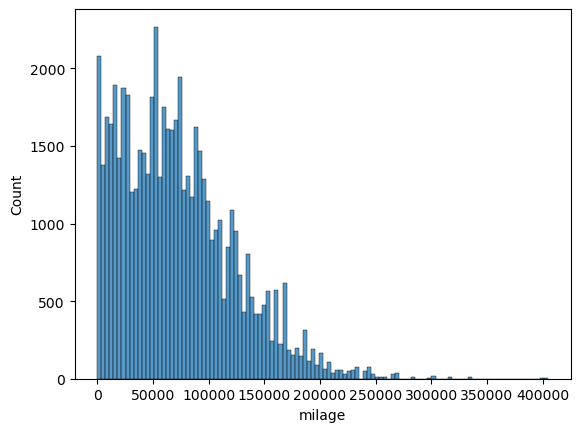

In [5]:
sns.histplot(train['milage'])

In [6]:
train.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [7]:
len(train)

58282

In [8]:
# year, milage, price

In [9]:
year_mean = train['model_year'].mean()
year_std_dev = train['model_year'].std()
lower_bound = year_mean - 3 * year_std_dev
upper_bound = year_mean + 3 * year_std_dev
#outliers = train[(train['model_year'] < lower_bound) | (train['model_year'] > upper_bound)]
pruned_year = train[(train['model_year'] >= lower_bound) & (train['model_year'] <= upper_bound)]


<Axes: xlabel='model_year', ylabel='Count'>

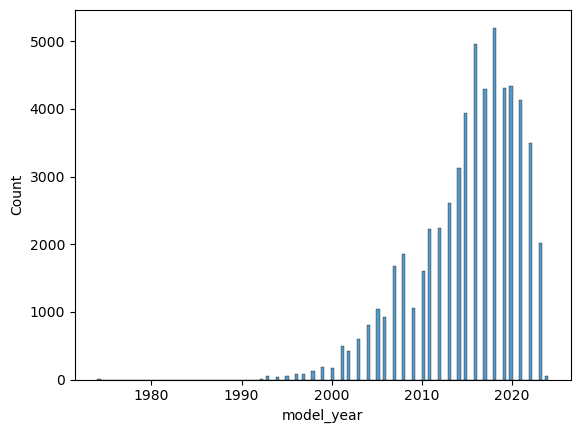

In [10]:
sns.histplot(train['model_year'])

<Axes: xlabel='model_year', ylabel='Count'>

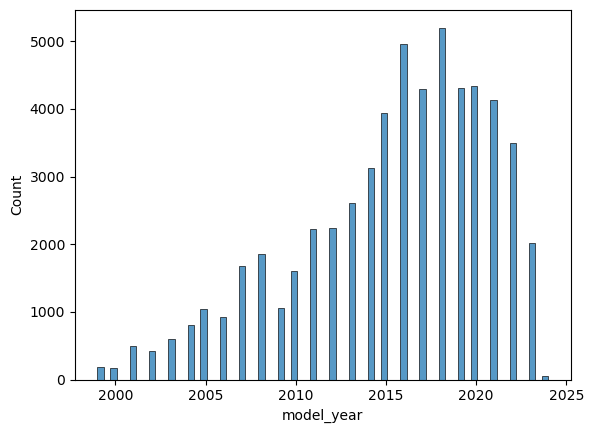

In [11]:
sns.histplot(pruned_year['model_year'])

In [12]:
pruned_year

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,349950
4005,Audi,S4 3.0T Premium Plus,2022,10900,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900
4006,Porsche,Taycan,2022,2116,NaN,Electric,Automatic,Black,Black,None reported,NaN,90998
4007,Ford,F-150 Raptor,2020,33000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999


In [13]:
milage_mean = pruned_year['milage'].mean()
milage_std_dev = pruned_year['milage'].std()
lower_bound_milage = milage_mean - 3 * milage_std_dev
upper_bound_milage = milage_mean + 3 * milage_std_dev
#outliers = train[(train['model_year'] < lower_bound) | (train['model_year'] > upper_bound)]
pruned_milage = pruned_year[(pruned_year['milage'] >= lower_bound_milage) & (pruned_year['milage'] <= upper_bound_milage)]


<Axes: xlabel='milage', ylabel='Count'>

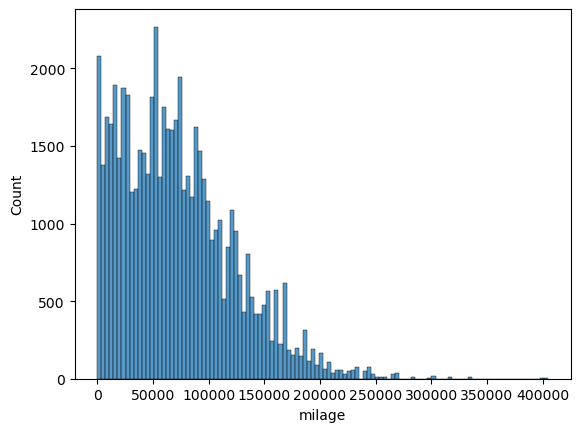

In [14]:
sns.histplot(train['milage'])

<Axes: xlabel='milage', ylabel='Count'>

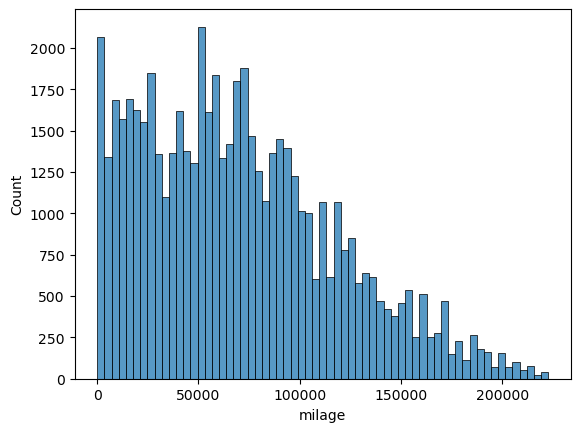

In [15]:
sns.histplot(pruned_milage['milage'])

In [16]:
price_mean = pruned_milage['price'].mean()
price_std_dev = pruned_milage['price'].std()
lower_bound_price = price_mean - 3 * price_std_dev
upper_bound_price = price_mean + 3 * price_std_dev
#outliers = train[(train['model_year'] < lower_bound) | (train['model_year'] > upper_bound)]
pruned_price = pruned_milage[(pruned_milage['price'] >= lower_bound_price) & (pruned_milage['price'] <= upper_bound_price)]


<Axes: xlabel='price', ylabel='Count'>

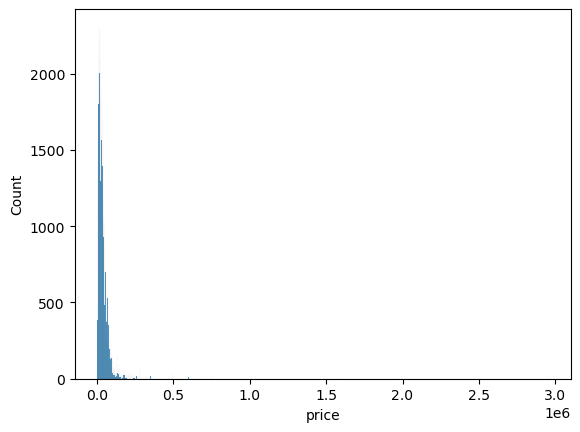

In [17]:

sns.histplot(train['price'])

<Axes: xlabel='price', ylabel='Count'>

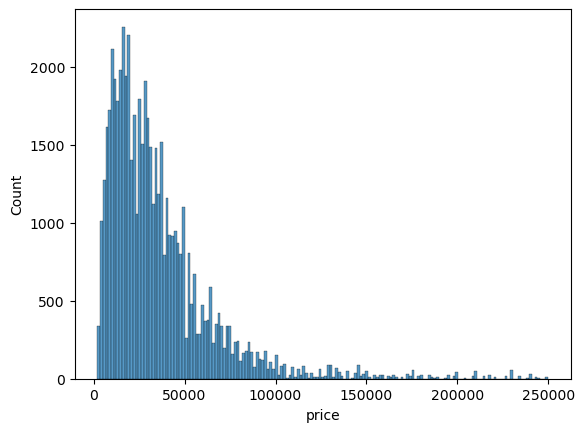

In [18]:
sns.histplot(pruned_price['price'])

<Axes: xlabel='milage', ylabel='Count'>

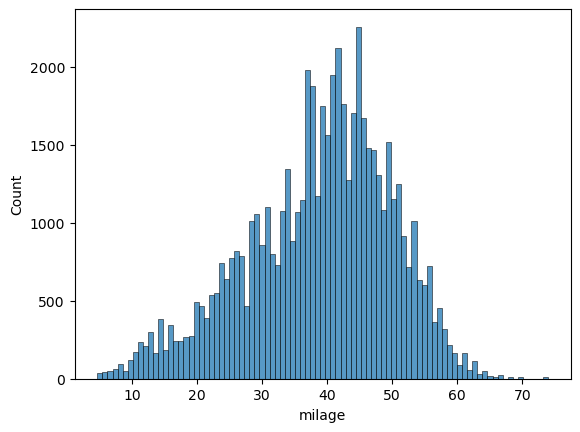

In [19]:
sns.histplot(np.cbrt(train['milage']))

In [20]:
train_unskw = pruned_price.copy()

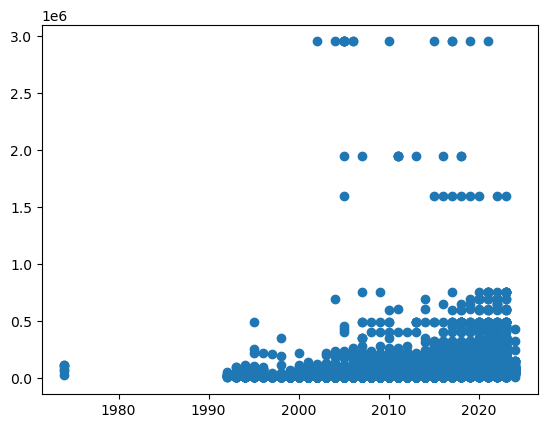

In [21]:
plt.scatter(train['model_year'], train['price'])

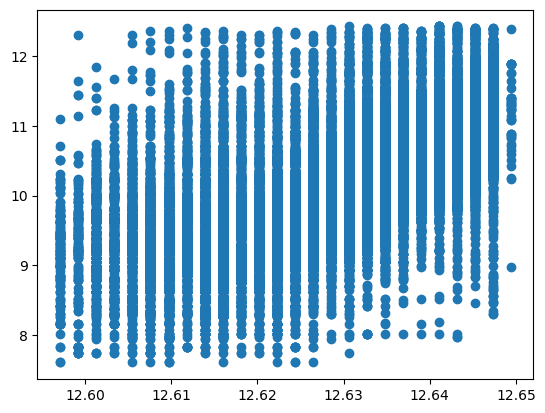

In [22]:
plt.scatter(np.cbrt(train_unskw['model_year']), np.log(train_unskw['price']))

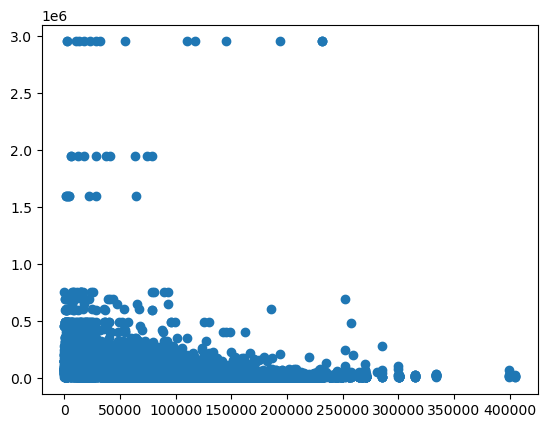

In [23]:
plt.scatter(train['milage'], train['price'])

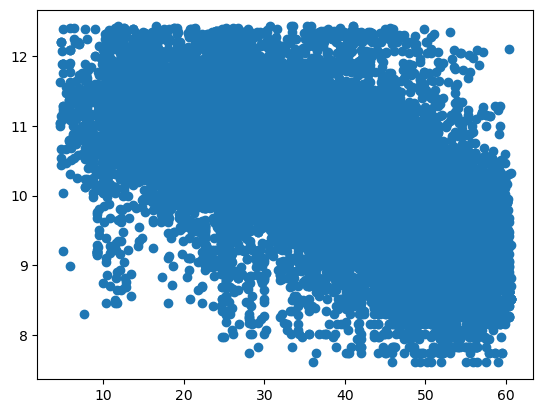

In [24]:
plt.scatter(np.cbrt(train_unskw['milage']), np.log(train_unskw['price']))

In [25]:
#log for price, sqrt n sqrt for milage, cbrt n sqrt for year

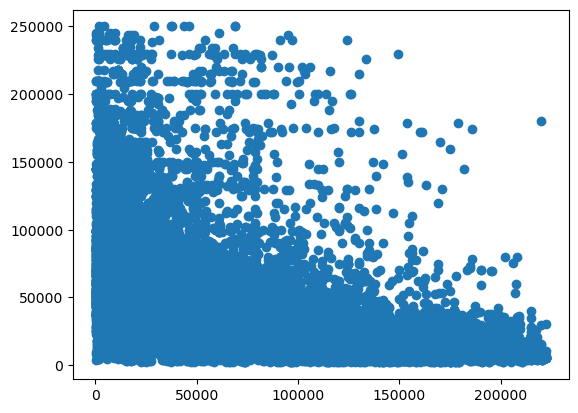

In [26]:
plt.scatter(train_unskw['milage'], train_unskw['price'])

In [27]:
train_unskewed = train_unskw.copy()

In [28]:
train_unskewed['model_year'] = np.cbrt(train_unskw['model_year'])
train_unskewed['milage'] = np.cbrt(train_unskw['milage'])
train_unskewed['price'] = np.log(train_unskw['price'])

C:\Users\KEI\AppData\Local\Temp\ipykernel_7484\3401330098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_unskewed['price'])


<Axes: xlabel='price', ylabel='Density'>

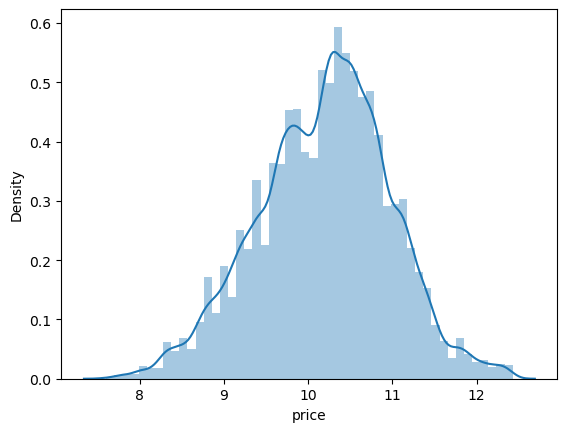

In [29]:
sns.distplot(train_unskewed['price'])

In [30]:
test_unskewed = test.copy()

In [31]:
test_unskewed['model_year'] = np.cbrt(test_unskewed['model_year'])
test_unskewed['milage'] = np.cbrt(test_unskewed['milage'])


In [32]:
#checking na
print(train_unskewed.isna().sum())
print('--------------- For test --------------')
print(test_unskewed.isna().sum())

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        109
clean_title     579
price             0
dtype: int64
--------------- For test --------------
id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64


In [33]:
train_unskewed_dropped_rows = train_unskewed.dropna()
print(train_unskewed_dropped_rows.isna().sum())


brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64


In [34]:
len(train_unskewed_dropped_rows)/len(train)

0.9629216567722453

In [35]:
train_unskewed_dropped_rows

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,F-150 Lariat,12.636895,42.049262,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,9.305651
1,BMW,335 i,12.613892,43.088694,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,9.017968
2,Jaguar,XF Luxury,12.618081,45.060166,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,9.615805
3,BMW,X7 xDrive40i,12.645239,13.457111,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,11.058795
4,Pontiac,Firebird Base,12.601310,48.058955,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,8.968269
...,...,...,...,...,...,...,...,...,...,...,...,...
4002,Mercedes-Benz,AMG GLS 63 4MATIC,12.647324,12.599210,Hybrid,603.0HP 4.0L 8 Cylinder Engine Gasoline/Mild E...,9-Speed A/T,Gray,Beige,None reported,Yes,12.072541
4003,Mercedes-Benz,E-Class E 300 4MATIC,12.636895,37.728677,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes,10.161998
4005,Audi,S4 3.0T Premium Plus,12.645239,22.172202,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,10.894886
4007,Ford,F-150 Raptor,12.641069,32.075343,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,11.050874


In [36]:
#testing linearity
train_unskewed_dropped_rows['brand'].value_counts()

BMW              7633
Ford             6829
Mercedes-Benz    5291
Chevrolet        4515
Audi             3059
Porsche          2697
Lexus            2357
Toyota           2343
Jeep             2279
Land             2067
Cadillac         1611
Nissan           1295
GMC              1137
Dodge            1037
RAM              1032
INFINITI         1007
Lincoln           807
Subaru            791
Mazda             775
Hyundai           748
Volkswagen        675
Jaguar            669
Honda             649
Acura             602
Kia               568
Volvo             473
MINI              393
Maserati          309
Bentley           285
Chrysler          277
Genesis           262
Buick             246
Mitsubishi        198
Hummer            186
Alfa              154
Pontiac           151
Rolls-Royce       126
Tesla             109
Lamborghini       107
Ferrari            70
Saturn             61
Scion              59
Aston              50
McLaren            40
Rivian             27
FIAT      

In [37]:
lin_trial1 = train_unskewed_dropped_rows[train_unskewed_dropped_rows['brand']=='Suzuki']
lin_trial1.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
390,Suzuki,SX4 Base,12.626450,46.413103,Gasoline,150.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,M/T,Orange,Gray,At least 1 accident or damage reported,Yes,9.392662
16905,Suzuki,SX4 Base,12.609701,45.078054,Gasoline,150.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,M/T,White,Black,None reported,Yes,8.779404
21966,Suzuki,SX4 Base,12.620174,48.791982,Gasoline,158.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,M/T,Red,Black,None reported,Yes,8.987197
38070,Suzuki,SX4 Base,12.628540,44.310476,Gasoline,150.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,At least 1 accident or damage reported,Yes,9.792556
3982,Suzuki,SX4 Base,12.626450,46.413103,Gasoline,150.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,M/T,Orange,Gray,At least 1 accident or damage reported,Yes,8.839277


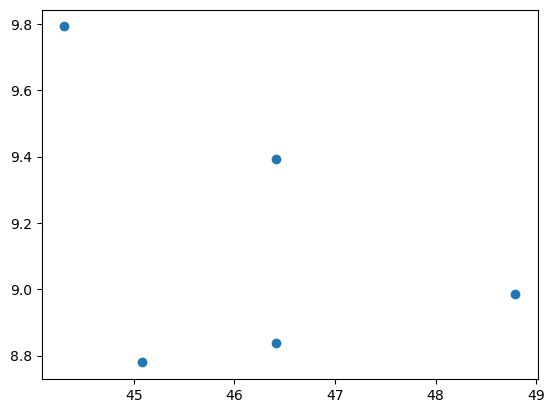

In [38]:
plt.scatter(lin_trial1['milage'], lin_trial1['price'])

In [39]:
#the model seems to be a bit linear but for smaller brands, it doesnt understand

In [40]:
#encoder
def fit_label_encoders(train_df, categorical_features):
    train_df = train_df.copy()
    label_encoders = {}
    for col in categorical_features:
        le = LabelEncoder()
        train_df[col] = le.fit_transform(train_df[col])
        label_encoders[col] = le
    return train_df, label_encoders

def transform_with_label_encoders(df, label_encoders):
    df = df.copy()
    for col, le in label_encoders.items():
        # Use fillna with a placeholder, e.g., 'unknown', for unseen categories
        df[col] = df[col].map(lambda s: 'unknown' if s not in le.classes_ else s)
        le.classes_ = np.append(le.classes_, 'unknown')
        df[col] = le.transform(df[col])
    return df


In [41]:
train_unskewed_dropped_rows.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [42]:
# List of categorical features
categorical_features = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

# Encode training data
train_df, label_encoders = fit_label_encoders(train_unskewed_dropped_rows, categorical_features)

In [43]:
train_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,13,640,12.636895,42.049262,2,720,2,25,57,1,0,9.305651
1,4,47,12.613892,43.088694,2,535,18,16,9,1,0,9.017968
2,20,1765,12.618081,45.060166,2,542,14,180,6,1,0,9.615805
3,4,1742,12.645239,13.457111,3,647,43,99,24,1,0,11.058795
4,39,689,12.601310,48.058955,2,221,34,248,9,1,0,8.968269


In [44]:
test_df = transform_with_label_encoders(test_unskewed, label_encoders)


In [45]:
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,34,534,12.628540,41.793392,2,555,34,248,6,1,0
1,54274,25,1260,12.630630,50.401041,2,416,27,211,9,1,0
2,54275,34,322,12.630630,37.321044,2,315,21,25,120,1,0
3,54276,24,1339,12.636895,30.898733,2,933,43,248,120,0,0
4,54277,4,1738,12.641069,44.814047,2,646,27,248,9,0,0


# dataset, I had already augmented the original dataset in a csv

In [46]:
# Split train data into training and validation sets
X = train_df.drop(['price'], axis=1)
y = train_df['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
test_df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'],
      dtype='object')

In [48]:
X_test = test_df.drop(['id'], axis=1)

In [49]:
X_test.columns == X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

# Linear regression

In [260]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [261]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [262]:
# Initialize the linear regression model
model1 = LinearRegression()

# Train the model
model1.fit(X_train_scaled, y_train)

# Make predictions on the validation set
X_scaled = scaler.transform(X)
y_ = model1.predict(X_scaled)
y_pred = model1.predict(X_val_scaled)

# Calculate RMSE
print("\n-------------on Train ----------------")
rmse_tr = np.sqrt(mean_squared_error(np.exp(y), np.exp(y_)))
print(f'RMSE : {rmse_tr}')
print("\n-------------on Test ----------------")
rmse = np.sqrt(mean_squared_error(np.exp(y_val), np.exp(y_pred)))
print(f'RMSE : {rmse}')


-------------on Train ----------------
RMSE : 23234.850654878897

-------------on Test ----------------
RMSE : 23064.45406919733


In [253]:
train_unskewed_dropped_rows.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,F-150 Lariat,12.636895,42.049262,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,9.305651
1,BMW,335 i,12.613892,43.088694,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,9.017968
2,Jaguar,XF Luxury,12.618081,45.060166,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,9.615805
3,BMW,X7 xDrive40i,12.645239,13.457111,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,11.058795
4,Pontiac,Firebird Base,12.601310,48.058955,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,8.968269


In [252]:
train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [254]:
y.head()

0     9.305651
1     9.017968
2     9.615805
3    11.058795
4     8.968269
Name: price, dtype: float64

In [256]:
np.exp(y)[:5]

0    11000.0
1     8250.0
2    15000.0
3    63500.0
4     7850.0
Name: price, dtype: float64

In [264]:
np.exp(y_)[:5]

array([32897.36719378, 14719.32478444, 16308.81385137, 69995.00775619,
        7750.90203704])

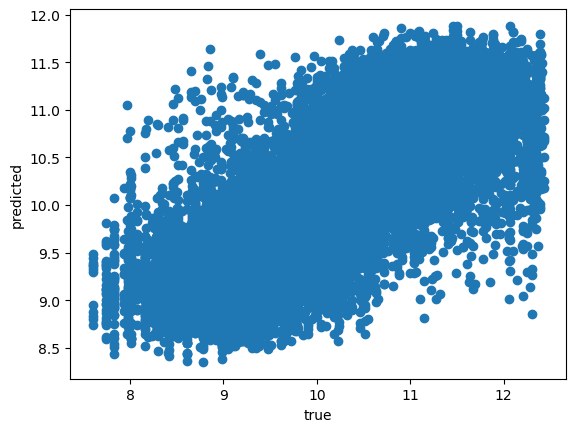

In [263]:
plt.scatter(y, y_)
plt.xlabel('true')
plt.ylabel('predicted')
plt.show()

# Random forest

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [266]:
# Initialize the linear regression model
model2 = RandomForestRegressor(random_state=42)

# Train the model
model2.fit(X_train, y_train)

# Make predictions on the validation set
y_2 = model2.predict(X)
y_pred_2 = model2.predict(X_val)

# Calculate RMSE
print("\n-------------on Train ----------------")
rmse_tr = np.sqrt(mean_squared_error(np.exp(y), np.exp(y_2)))
print(f'RMSE : {rmse_tr}')
print("\n-------------on Test ----------------")
rmse = np.sqrt(mean_squared_error(np.exp(y_val), np.exp(y_pred_2)))
print(f'RMSE : {rmse}')


-------------on Train ----------------
RMSE : 13810.140728582803

-------------on Test ----------------
RMSE : 22068.773496409696


In [268]:
np.exp(y_2)[:5]

array([17611.43892046, 11271.22334906, 12946.01885181, 70911.06265071,
       13849.85761204])

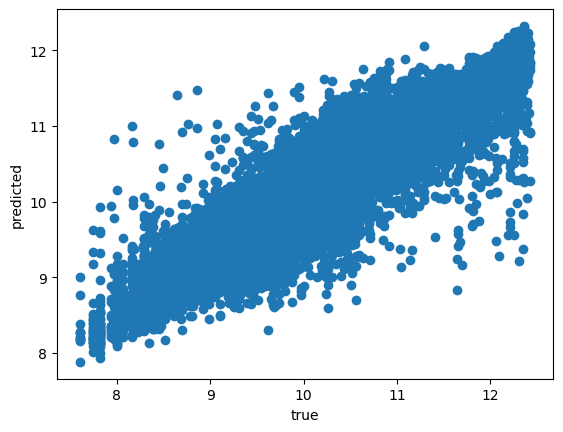

In [269]:
plt.scatter(y, y_2)
plt.xlabel('true')
plt.ylabel('predicted')
plt.show()

# Gradient boost regressor

In [271]:
from sklearn.ensemble import GradientBoostingRegressor


In [272]:
# Initialize the linear regression model
model3 = GradientBoostingRegressor(random_state=42)

# Train the model
model3.fit(X_train, y_train)

# Make predictions on the validation set
y_3 = model3.predict(X)
y_pred_3 = model3.predict(X_val)

# Calculate RMSE
print("\n-------------on Train ----------------")
rmse_tr = np.sqrt(mean_squared_error(np.exp(y), np.exp(y_3)))
print(f'RMSE : {rmse_tr}')
print("\n-------------on Test ----------------")
rmse = np.sqrt(mean_squared_error(np.exp(y_val), np.exp(y_pred_3)))
print(f'RMSE : {rmse}')


-------------on Train ----------------
RMSE : 22132.49615901129

-------------on Test ----------------
RMSE : 22182.287611918648


In [275]:
np.exp(y_3)[:5]

array([33526.91435201, 16674.18711971, 12694.11698514, 62715.28717429,
        8977.75791756])

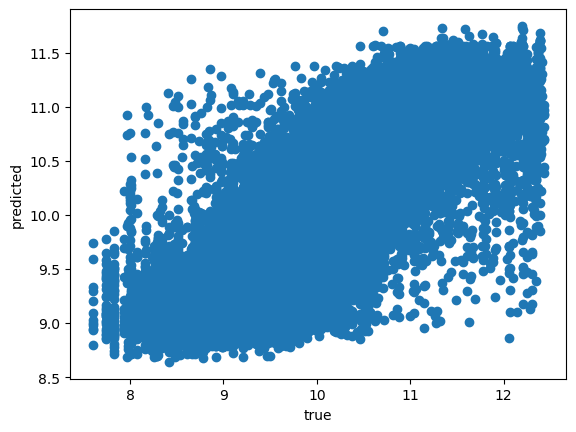

In [276]:
plt.scatter(y, y_3)
plt.xlabel('true')
plt.ylabel('predicted')
plt.show()

# xgboost

In [277]:
# i hadnt installed this module yet
#import xgboost as xgb


ModuleNotFoundError: No module named 'xgboost'

# lightgbm

In [279]:
from lightgbm import LGBMRegressor


In [280]:
# Initialize the linear regression model
model5 = LGBMRegressor(random_state=42)

# Train the model
model5.fit(X_train, y_train)

# Make predictions on the validation set
y_5 = model5.predict(X)
y_pred_5 = model5.predict(X_val)

# Calculate RMSE
print("\n-------------on Train ----------------")
rmse_tr = np.sqrt(mean_squared_error(np.exp(y), np.exp(y_5)))
print(f'RMSE : {rmse_tr}')
print("\n-------------on Test ----------------")
rmse = np.sqrt(mean_squared_error(np.exp(y_val), np.exp(y_pred_5)))
print(f'RMSE : {rmse}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1155
[LightGBM] [Info] Number of data points in the train set: 44896, number of used features: 10
[LightGBM] [Info] Start training from score 10.185550

-------------on Train ----------------
RMSE : 21437.350250202097

-------------on Test ----------------
RMSE : 21827.864943516648


In [281]:
np.exp(y_5)[:5]

array([34404.05584538, 15645.34481598, 12530.71448174, 65550.6999863 ,
       10170.24148241])

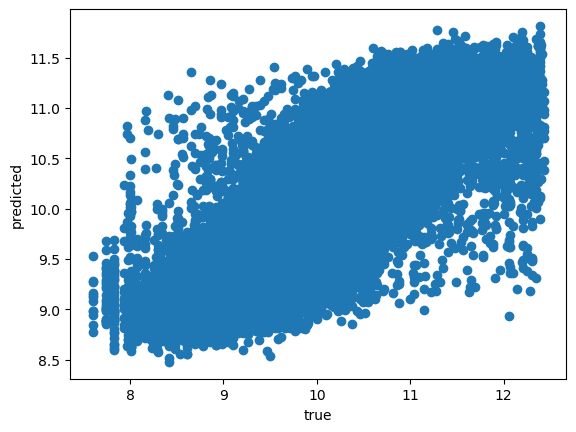

In [287]:
plt.scatter(y, y_5)
plt.xlabel('true')
plt.ylabel('predicted')
plt.show()

# Kmeans + linear regression

In [288]:
from sklearn.cluster import KMeans


In [308]:
#generate clusters
# Initialize KMeans with desired number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit KMeans on the training data
kmeans.fit(X_train)

# Obtain cluster labels for training and validation data
X_train_clusters = kmeans.predict(X_train)
X_val_clusters = kmeans.predict(X_val)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [309]:
X_clusters = kmeans.predict(X)

In [310]:
# Add cluster labels as new features
X_train_k = X_train.copy()
X_val_k = X_val.copy()
X_k = X.copy()

X_train_k['cluster'] = X_train_clusters
X_val_k['cluster'] = X_val_clusters
X_k['cluster'] = X_clusters

In [311]:
# Initialize the linear regression model
model6 = LinearRegression()

# Train the model
model6.fit(X_train_k, y_train)

# Make predictions on the validation set
y_6 = model6.predict(X_k)
y_pred_6 = model6.predict(X_val_k)

# Calculate RMSE
print("\n-------------on Train ----------------")
rmse_tr = np.sqrt(mean_squared_error(np.exp(y), np.exp(y_6)))
print(f'RMSE : {rmse_tr}')
print("\n-------------on Test ----------------")
rmse = np.sqrt(mean_squared_error(np.exp(y_val), np.exp(y_pred_6)))
print(f'RMSE : {rmse}')


-------------on Train ----------------
RMSE : 23235.50613984393

-------------on Test ----------------
RMSE : 23065.158171788786


In [313]:
# Initialize the linear regression model
model7 = RandomForestRegressor(random_state=42)

# Train the model
model7.fit(X_train_k, y_train)

# Make predictions on the validation set
y_7 = model7.predict(X_k)
y_pred_7 = model7.predict(X_val_k)

# Calculate RMSE
print("\n-------------on Train ----------------")
rmse_tr = np.sqrt(mean_squared_error(np.exp(y), np.exp(y_7)))
print(f'RMSE : {rmse_tr}')
print("\n-------------on Test ----------------")
rmse = np.sqrt(mean_squared_error(np.exp(y_val), np.exp(y_pred_7)))
print(f'RMSE : {rmse}')


-------------on Train ----------------
RMSE : 13814.627124781318

-------------on Test ----------------
RMSE : 22081.637715990404


# Neural network

In [316]:
from sklearn.neural_network import MLPRegressor


In [318]:
#this guy failed to work, probably i did a wrong initiation
"""
# Initialize the linear regression model
model8 = MLPRegressor(hidden_layer_sizes=(100, 20),
                     activation='relu',
                     solver='adam',
                     learning_rate='constant',
                     learning_rate_init=0.01,
                     batch_size=32,
                     random_state=42)

# Train the model
model8.fit(X_train, y_train, verbose=True)

# Make predictions on the validation set
y_8 = model8.predict(X)
y_pred_8 = model8.predict(X_val)

# Calculate RMSE
print("\n-------------on Train ----------------")
rmse_tr = np.sqrt(mean_squared_error(np.exp(y), np.exp(y_8)))
print(f'RMSE : {rmse_tr}')
print("\n-------------on Test ----------------")
rmse = np.sqrt(mean_squared_error(np.exp(y_val), np.exp(y_pred_8)))
print(f'RMSE : {rmse}')

"""

TypeError: BaseMultilayerPerceptron.fit() got an unexpected keyword argument 'verbose'

# Winner

In [324]:
# Initialize the linear regression model
model_final = RandomForestRegressor(random_state=42)

# Train the model
model_final.fit(X, y)

# Make predictions on the validation set
y_final = model_final.predict(X)

# Calculate RMSE
print("\n-------------on Train ----------------")
rmse_tr = np.sqrt(mean_squared_error(np.exp(y), np.exp(y_final)))
print(f'RMSE : {rmse_tr}')



-------------on Train ----------------
RMSE : 10823.757752288824


In [325]:
y_pred_final = model_final.predict(X_test)


In [326]:
X_test_p = X_test.copy()

In [329]:
X_test_p['price']=np.exp(y_pred_final)

In [330]:
X_test_p

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,34,534,12.628540,41.793392,2,555,34,248,6,1,0,20105.954926
1,25,1260,12.630630,50.401041,2,416,27,211,9,1,0,15352.016293
2,34,322,12.630630,37.321044,2,315,21,25,120,1,0,24799.642713
3,24,1339,12.636895,30.898733,2,933,43,248,120,0,0,52456.141830
4,4,1738,12.641069,44.814047,2,646,27,248,9,0,0,29184.436537
...,...,...,...,...,...,...,...,...,...,...,...,...
36178,14,1792,12.638982,16.509636,2,826,2,99,9,1,0,69059.147906
36179,8,1507,12.607604,56.980192,2,480,6,187,57,0,0,9966.263740
36180,50,485,12.622267,48.769990,2,31,10,12,57,1,0,9836.247068
36181,26,1099,12.638982,33.912114,2,862,2,16,87,1,0,47401.894331


In [333]:
subm = test[['id']]

In [334]:
subm

,id
0,54273
1,54274
2,54275
3,54276
4,54277
...,...
36178,90451
36179,90452
36180,90453
36181,90454


In [335]:
subm['price']=X_test_p['price']

C:\Users\KEI\AppData\Local\Temp\ipykernel_8312\3941488274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subm['price']=X_test_p['price']


In [336]:
subm

,id,price
0,54273,20105.954926
1,54274,15352.016293
2,54275,24799.642713
3,54276,52456.141830
4,54277,29184.436537
...,...,...
36178,90451,69059.147906
36179,90452,9966.263740
36180,90453,9836.247068
36181,90454,47401.894331


# grid search 

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error


In [65]:

# Define the parameter grid
param_grid = {
    #'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the RandomForestRegressor
model_final = RandomForestRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=model_final, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_final = best_model.predict(X_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(np.exp(y_val), np.exp(y_pred_final)))
print(f'Best Parameters: {best_params}')
print(f'RMSE on validation set: {rmse}')


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters: {'max_depth': 10}
RMSE on validation set: 22088.843522057537


In [66]:
#100 estimators, 10 splits, 4 leafs, max features sqrt, max depth

In [71]:
# Initialize the linear regression model, has given me best performance after changing random state
model_best = RandomForestRegressor(#n_estimators=100,
                                    #min_samples_split=10,
                                    #min_samples_leaf=4,
                                    #max_features='sqrt',
                                    random_state=23)

# Train the model
model_best.fit(X, y)

# Make predictions on the validation set
y_best = model_best.predict(X)

# Calculate RMSE
print("\n-------------on Train ----------------")
rmse_tr = np.sqrt(mean_squared_error(np.exp(y), np.exp(y_best)))
print(f'RMSE : {rmse_tr}')



-------------on Train ----------------
RMSE : 10809.222765667339


In [ ]:
# Initialize the linear regression model
model_best = RandomForestRegressor(n_estimators=1000,
                                    #min_samples_split=10,
                                    #min_samples_leaf=4,
                                    #max_features='sqrt',
                                    random_state=23)

# Train the model
model_best.fit(X, y)

# Make predictions on the validation set
y_best = model_best.predict(X)

# Calculate RMSE
print("\n-------------on Train ----------------")
rmse_tr = np.sqrt(mean_squared_error(np.exp(y), np.exp(y_best)))
print(f'RMSE : {rmse_tr}')


In [88]:
y_pred_best = model_best.predict(X_test)


In [89]:
X_test_p = X_test.copy()
X_test_p['price']=np.exp(y_pred_best)

In [90]:
X_test_p

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,34,534,12.628540,41.793392,2,555,34,248,6,1,0,20978.813888
1,25,1260,12.630630,50.401041,2,416,27,211,9,1,0,14530.037319
2,34,322,12.630630,37.321044,2,315,21,25,120,1,0,26526.107507
3,24,1339,12.636895,30.898733,2,933,43,248,120,0,0,56137.711814
4,4,1738,12.641069,44.814047,2,646,27,248,9,0,0,29163.117803
...,...,...,...,...,...,...,...,...,...,...,...,...
36178,14,1792,12.638982,16.509636,2,826,2,99,9,1,0,68746.539090
36179,8,1507,12.607604,56.980192,2,480,6,187,57,0,0,10051.283886
36180,50,485,12.622267,48.769990,2,31,10,12,57,1,0,9266.165580
36181,26,1099,12.638982,33.912114,2,862,2,16,87,1,0,49251.101083


In [91]:
subm2 = test[['id']]

In [92]:
subm2['price']=X_test_p['price']

C:\Users\KEI\AppData\Local\Temp\ipykernel_7484\1250753083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subm2['price']=X_test_p['price']


In [93]:
subm2

,id,price
0,54273,20978.813888
1,54274,14530.037319
2,54275,26526.107507
3,54276,56137.711814
4,54277,29163.117803
...,...,...
36178,90451,68746.539090
36179,90452,10051.283886
36180,90453,9266.165580
36181,90454,49251.101083


In [94]:
subm2.to_csv('submission8.csv', index=False)